## Industry Project - Chicago Crime 2012 - 2017 EDA & Visualizations
### April 18th, 2024

In [1]:
# Formatting the Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset as 'df'
df_original = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv')
df = df_original.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

### Data Dictionary
`Unnamed: 0:` Unknown column - *can be dropped* <br>
`ID:` Reference number for row in the dataset - *can be dropped* <br>
`Case Number:` Crime case reference ID <br>
`Date:` Incident date <br>
`Block:` Street Address nomenclature where the incident occured <br>
`Illinois Uniform Crime Reporting:` Crime type code <br>
`Primary Type:` Type of crime committed <br>
`Description:` Description of crime type <br>
`Location Description:` Type of location where the crime occurred <br>
`Arrest:` Boolean value indicating if an arresst was made <br>
`Domestic:` Boolean value indicating if the incident was domestic <br>
`Beat:` Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car - *can be dropped* <br>
`District:` Police district where the incident occurred <br>
`Ward:` City Council district where the incident occurred *can be dropped* <br>
`Community Area:` Indicates the community area where the incident occurred. Chicago has 77 community areas  <br>
`FBI Code:` Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System  <br>
`X Coordinate:` The x coordinate of the location where the incident occurred in State Plane <br>
`Y Coordinate:` The y coordinate of the location where the incident occurred in State Plane <br>
`Year:` Year the incident occurred <br>
`Updated On:` Date and time the record was last updated <br>
`Latitude:` The latitude of the location where the incident occurred <br>
`Longitude:` The longitude of the location where the incident occurred.Date when the facility was inaugurated <br>
`Location:` The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. <br>

In [5]:
# Dropping irrelevant columns
irrelevant_columns = ['Unnamed: 0','ID','Beat','Ward'] 

df = df.drop(columns=irrelevant_columns)

In [6]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Case Number           1456713 non-null  object 
 1   Date                  1456714 non-null  object 
 2   Block                 1456714 non-null  object 
 3   IUCR                  1456714 non-null  object 
 4   Primary Type          1456714 non-null  object 
 5   Description           1456714 non-null  object 
 6   Location Description  1455056 non-null  object 
 7   Arrest                1456714 non-null  bool   
 8   Domestic              1456714 non-null  bool   
 9   District              1456713 non-null  float64
 10  Community Area        1456674 non-null  float64
 11  FBI Code              1456714 non-null  object 
 12  X Coordinate          1419631 non-null  float64
 13  Y Coordinate          1419631 non-null  float64
 14  Year                  1456714 non-

In [7]:
# Checking for Null values
df.isna().sum()

Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
District                    1
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

##### <center> All nulls are found on location/coordinate records, which are highly relevant in our analysis. Thus, all nulls will be dropped as they only account for > 3% of our overall dataset - no major impact.

In [8]:
# Drop Nulls
df = df.dropna()

In [9]:
# Sanity Check
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1418379 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Case Number           1418379 non-null  object 
 1   Date                  1418379 non-null  object 
 2   Block                 1418379 non-null  object 
 3   IUCR                  1418379 non-null  object 
 4   Primary Type          1418379 non-null  object 
 5   Description           1418379 non-null  object 
 6   Location Description  1418379 non-null  object 
 7   Arrest                1418379 non-null  bool   
 8   Domestic              1418379 non-null  bool   
 9   District              1418379 non-null  float64
 10  Community Area        1418379 non-null  float64
 11  FBI Code              1418379 non-null  object 
 12  X Coordinate          1418379 non-null  float64
 13  Y Coordinate          1418379 non-null  float64
 14  Year                  1418379 non-null 

(1418379, 19)

##### <center> We now have an even dataset with no null values

In [10]:
# Checking Value counts
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Case Number
Case Number
HZ140230    6
HZ403466    4
HZ554936    4
HW486725    3
HV217424    3
           ..
HW217671    1
HW217765    1
HW217621    1
HW217637    1
HZ250517    1
Name: count, Length: 1418272, dtype: int64


Column: Date
Date
01/01/2012 12:01:00 AM    126
01/01/2015 12:01:00 AM     97
01/01/2015 12:00:00 AM     88
01/01/2012 12:00:00 AM     78
01/01/2013 09:00:00 AM     77
                         ... 
09/22/2013 10:08:00 PM      1
09/22/2013 09:12:00 PM      1
09/22/2013 08:15:00 AM      1
09/22/2013 07:53:00 PM      1
05/03/2016 09:07:00 PM      1
Name: count, Length: 571110, dtype: int64


Column: Block
Block
001XX N STATE ST        3567
0000X W TERMINAL ST     2671
008XX N MICHIGAN AVE    2430
076XX S CICERO AVE      2090
0000X N STATE ST        1810
                        ... 
032XX W 80TH ST            1
0000X W 93RD ST            1
028XX W 80TH ST            1
053XX N MENARD AVE         1
000XX W 79TH ST            1
Name: count, Length: 32549, dtype: int

In [11]:
# Create dummy column to plot
dummy_df = pd.get_dummies(df['Primary Type'])

# Concatenate dummy columns with original dataframe
df_with_dummies = pd.concat([df, dummy_df], axis=1)

In [12]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418379 entries, 0 to 1456713
Data columns (total 52 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Case Number                        1418379 non-null  object 
 1   Date                               1418379 non-null  object 
 2   Block                              1418379 non-null  object 
 3   IUCR                               1418379 non-null  object 
 4   Primary Type                       1418379 non-null  object 
 5   Description                        1418379 non-null  object 
 6   Location Description               1418379 non-null  object 
 7   Arrest                             1418379 non-null  bool   
 8   Domestic                           1418379 non-null  bool   
 9   District                           1418379 non-null  float64
 10  Community Area                     1418379 non-null  float64
 11  FBI Code                     

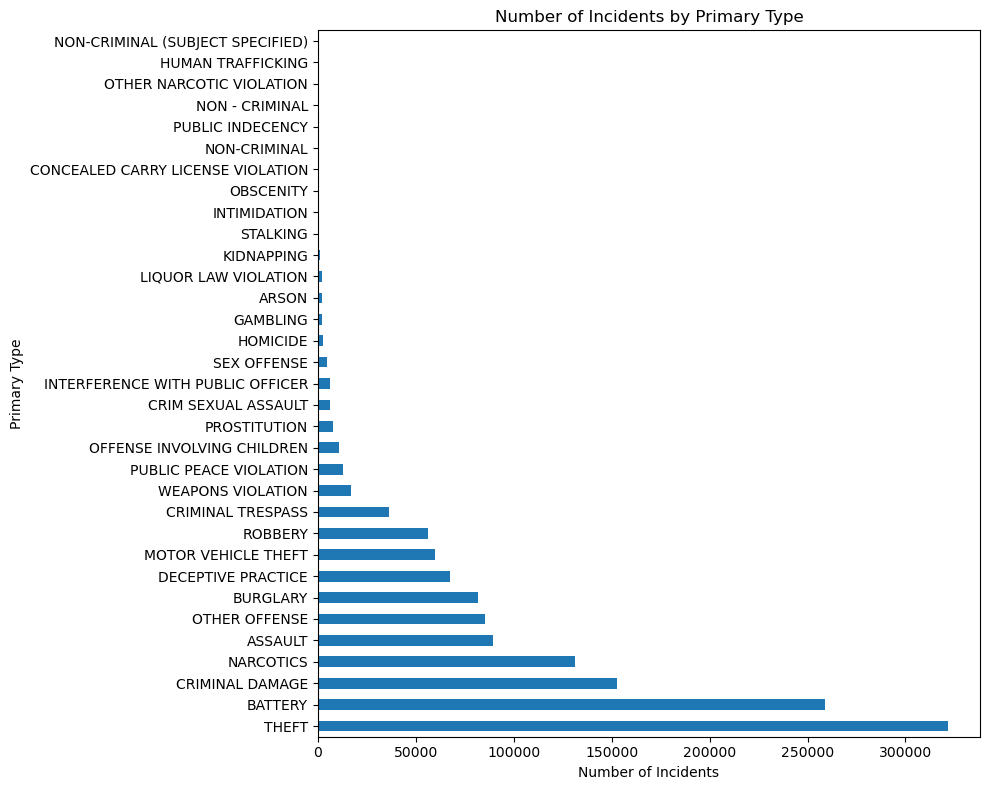

In [13]:
primary_type_counts = df['Primary Type'].value_counts()

# plot horizontal bar chart
plt.figure(figsize=(10, 8))
primary_type_counts.plot(kind='barh')
plt.title('Number of Incidents by Primary Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

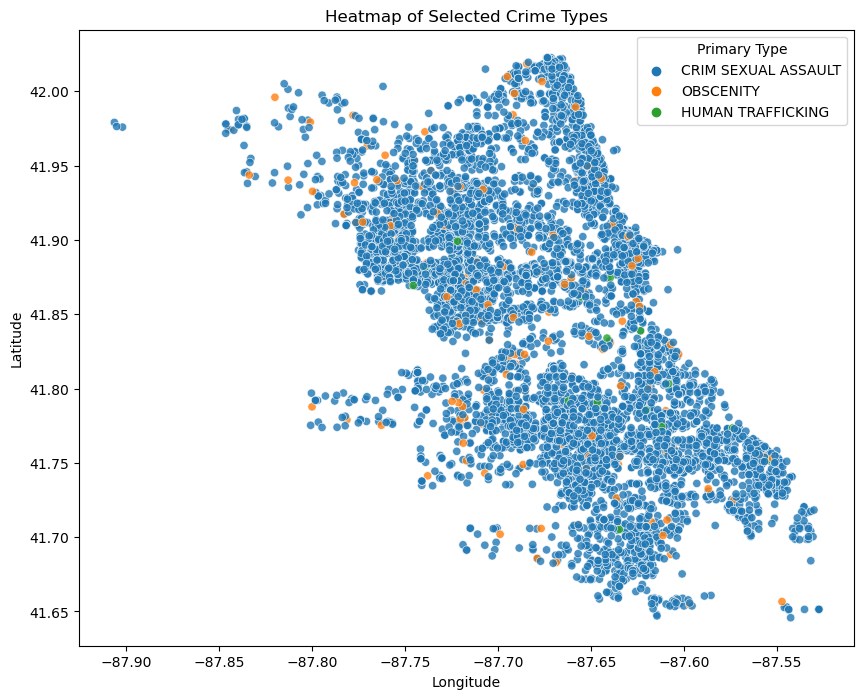

In [14]:
# Filter dataframe to columns of interest
selected_types = ['CRIM SEXUAL ASSAULT', 'HUMAN TRAFFICKING', 'OBSCENITY']
selected_df = df[df['Primary Type'].isin(selected_types)]

# Plot heatmap on coordinate chart
plt.figure(figsize=(10, 8))
sns.scatterplot(data=selected_df, x='Longitude', y='Latitude', hue='Primary Type', alpha=0.8)
plt.title('Heatmap of Selected Crime Types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Type', loc='upper right')
plt.show()


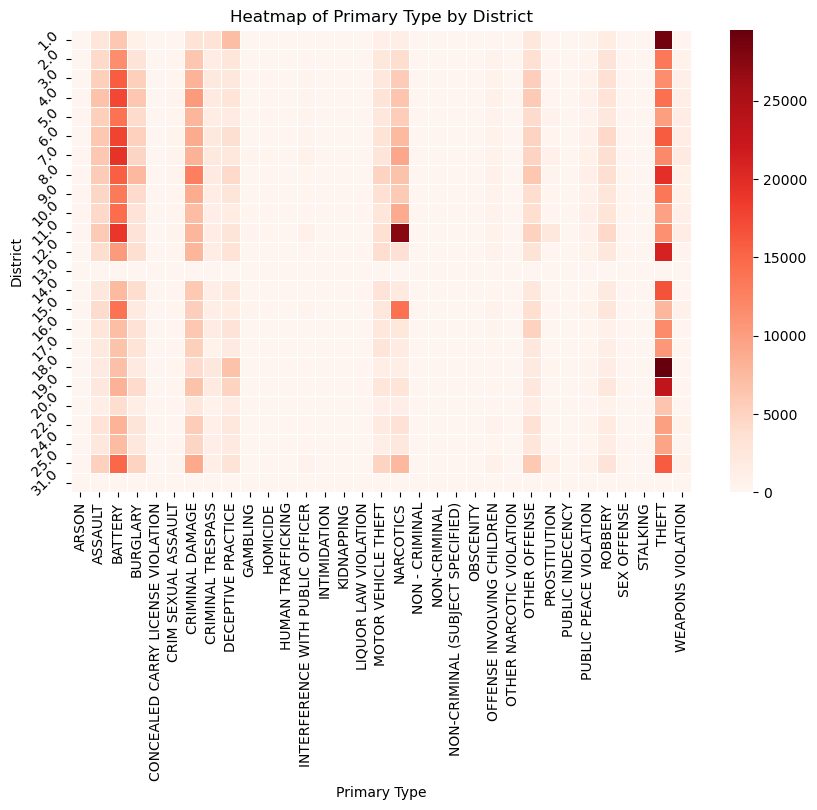

In [17]:
# Group by 'District' and 'Primary Type' & count the occurrences
community_primary_counts = df.groupby(['District', 'Primary Type']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(community_primary_counts, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Primary Type by District')
plt.xlabel('Primary Type')
plt.ylabel('District')
# plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Group by 'Community Area' and 'Primary Type' & count the occurrences
community_primary_counts = df.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

# Plot stacked bar chart
community_primary_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Stacked Bar Chart of Primary Type by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Statistical Analysis

Focusing on crime Criminal Sexual Assault, is there a significant differences in the occurences in the different districts and Community areas?

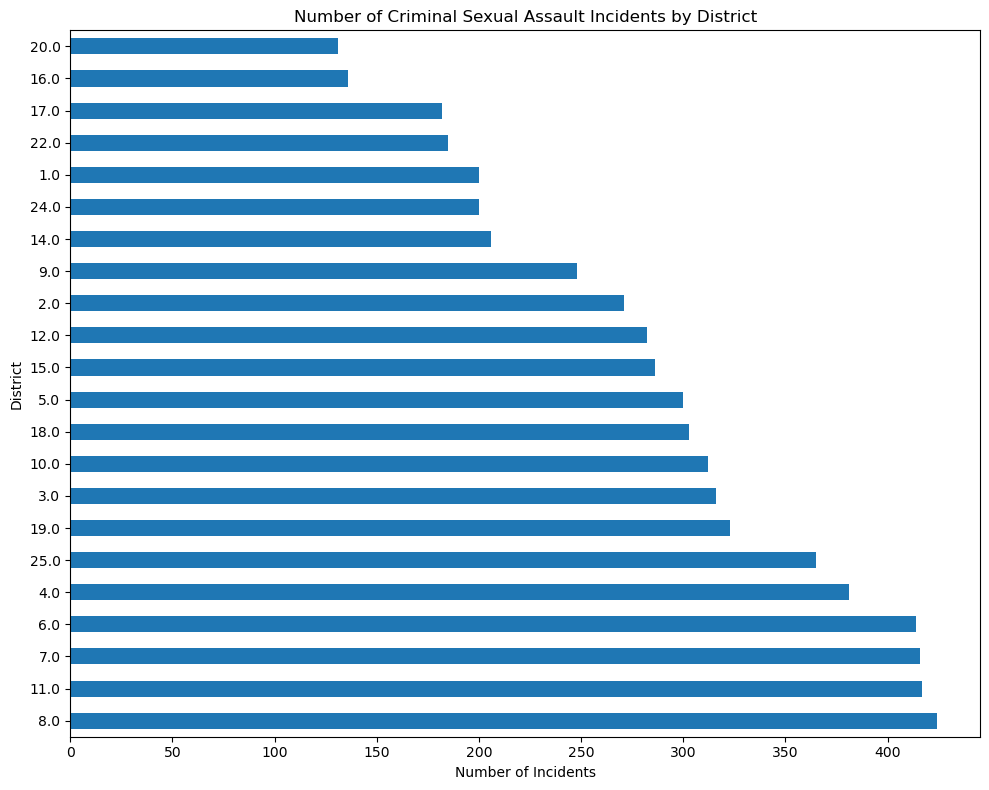

In [25]:
#Plot the number of Criminal Assaults per district

df_csa = df[df['Primary Type'] == "CRIM SEXUAL ASSAULT"]

district_counts = df_csa['District'].value_counts()

# plot horizontal bar chart
plt.figure(figsize=(10, 8))
district_counts.plot(kind='barh')
plt.title('Number of Criminal Sexual Assault Incidents by District')
plt.xlabel('Number of Incidents')
plt.ylabel('District')
plt.tight_layout()
plt.show()


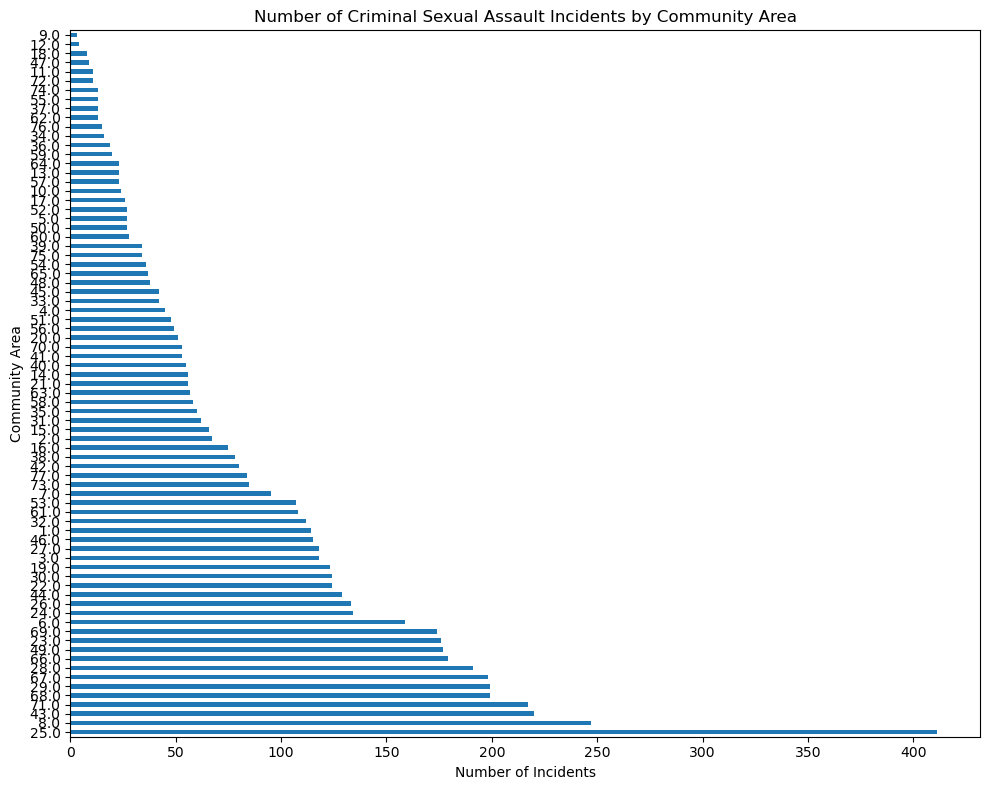

In [26]:
#Plot the number of criminal sexual assaults by Community Area

comm_counts = df_csa['Community Area'].value_counts()

# plot horizontal bar chart
plt.figure(figsize=(10, 8))
comm_counts.plot(kind='barh')
plt.title('Number of Criminal Sexual Assault Incidents by Community Area')
plt.xlabel('Number of Incidents')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


In [28]:
#community Areas in District 8:

df[df['District'] == 8.0]['Community Area'].unique()

array([66., 58., 56., 63., 65., 62., 57., 70., 64., 30.,  0., 43.])

In [29]:
#community Areas in District 11:

df[df['District'] == 11.0]['Community Area'].unique()

array([26., 23., 27., 25., 29., 28., 76., 49., 42.])

Community Area 25, which is part of District 8, shows a very high number of criminal sexual assaults

In [32]:
#Plot on a map

fig = px.scatter_mapbox(df_csa, lat="Latitude", lon="Longitude", color = "District",  hover_name="Description", hover_data=["District", "Community Area"] )
fig.update_layout(mapbox_style="open-street-map")


# Remove color legend
fig.update(layout_coloraxis_showscale=False)

fig.show()

We will create an extra column that indicates whether a crime is sexual assault or not

In [33]:
# Use np.where to create a mask for the specific entry
mask = np.where(df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 1, 0)

# Assign the mask to a new column
df['is_sexual_assault'] = mask

df.head()

Case Number                    Date                Block  IUCR  \
0    HZ250496  05/03/2016 11:40:00 PM   013XX S SAWYER AVE  0486   
1    HZ250409  05/03/2016 09:40:00 PM   061XX S DREXEL AVE  0486   
2    HZ250503  05/03/2016 11:31:00 PM  053XX W CHICAGO AVE  0470   
3    HZ250424  05/03/2016 10:10:00 PM    049XX W FULTON ST  0460   
4    HZ250455  05/03/2016 10:00:00 PM    003XX N LOTUS AVE  0820   

             Primary Type              Description Location Description  \
0                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3                 BATTERY                   SIMPLE             SIDEWALK   
4                   THEFT           $500 AND UNDER            RESIDENCE   

   Arrest  Domestic  District  Community Area FBI Code  X Coordinate  \
0    True      True      10.0            29.0      08B     1154907.0   
1   False      True       3.0            42.0      08B     1183066.0   
2   False     False      15.0            25.0       24     1140789.0   
3   False     False      15.0            25.0      08B     1143223.0   
4   False      True      15.0            25.0       06     1139890.0   

   Y Coordinate  Year              Updated On   Latitude  Longitude  \
0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073 -87.706819   
1     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922 -87.604363   
2     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908 -87.758372   
3     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687 -87.749516   
4     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297 -87.761751   

                        Location  is_sexual_assualt  
0  (41.864073157, -87.706818608)                  0  
1   (41.782921527, -87.60436317)                  0  
2  (41.894908283, -87.758371958)                  0  
3  (41.885686845, -87.749515983)                  0  
4  (41.886297242, -87.761750709)                  0

In [35]:
csa_counts = df.groupby('District')['is_sexual_assault'].value_counts().unstack(fill_value=0)
csa_counts

is_sexual_assualt      0    1
District                     
1.0                59956  200
2.0                58399  271
3.0                71238  316
4.0                83187  381
5.0                63109  300
6.0                84274  414
7.0                81700  416
8.0                93791  424
9.0                68902  248
10.0               64423  312
11.0               99533  417
12.0               67334  282
13.0                   1    0
14.0               50725  206
15.0               62844  286
16.0               48346  136
17.0               40131  182
18.0               61421  303
19.0               63794  323
20.0               22947  131
22.0               46028  185
24.0               39060  200
25.0               80912  365
31.0                  26    0

In [41]:
csa_counts = csa_counts.T
csa_counts.reset_index()
csa_counts

District            1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   \
is_sexual_assualt                                                           
0                  59956  58399  71238  83187  63109  84274  81700  93791   
1                    200    271    316    381    300    414    416    424   

District            9.0    10.0  ...   15.0   16.0   17.0   18.0   19.0  \
is_sexual_assualt                ...                                      
0                  68902  64423  ...  62844  48346  40131  61421  63794   
1                    248    312  ...    286    136    182    303    323   

District            20.0   22.0   24.0   25.0  31.0  
is_sexual_assualt                                    
0                  22947  46028  39060  80912    26  
1                    131    185    200    365     0  

[2 rows x 24 columns]

**Hypothesis Testing:**

We have 2 categorical variables, the sexual assault variable and the district. 

$H_0$: There is no relationship between the crime being sexual assault and the district

$H_1$: There is a relationship

To test our null hypothesis, because we have several different categories, we will use a $\chi^2$-test

In [45]:
stats.chi2_contingency(csa_counts)

Chi2ContingencyResult(statistic=99.77590773002379, pvalue=1.5389994994061788e-11, dof=23, expected_freq=array([[5.98888905e+04, 5.84094888e+04, 7.12362802e+04, 8.31969347e+04,
        6.31274463e+04, 8.43119616e+04, 8.17513820e+04, 9.37966590e+04,
        6.88429546e+04, 6.44475585e+04, 9.95061940e+04, 6.73157660e+04,
        9.95559720e-01, 5.07048521e+04, 6.28496851e+04, 4.82667263e+04,
        4.01339990e+04, 6.14499282e+04, 6.38323026e+04, 2.29755272e+04,
        4.60078013e+04, 3.90856746e+04, 8.09161074e+04, 2.58845527e+01],
       [2.67109488e+02, 2.60511231e+02, 3.17719800e+02, 3.71065325e+02,
        2.81553719e+02, 3.76038438e+02, 3.64618038e+02, 4.18340986e+02,
        3.07045367e+02, 2.87441530e+02, 4.43805993e+02, 3.00233977e+02,
        4.44028007e-03, 2.26147904e+02, 2.80314881e+02, 2.15273658e+02,
        1.79001010e+02, 2.74071847e+02, 2.84697437e+02, 1.02472783e+02,
        2.05198663e+02, 1.74325395e+02, 3.60892643e+02, 1.15447282e-01]]))

The p-value is tiny, which means we can say with confidence that there is a  statistical relationship between a crime being a sexual assault crime and the District where it occured.